In [1]:
import sys
sys.path.append('pysubgroup')
from model_mining.evaluation_framework import *
from model_mining.QualityFunctions import *
from pathlib import Path
import numpy as np
import pandas as pd
from collections import namedtuple
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
date_path=Path('02_05')
folder= Path.home()/Path('experiments')/date_path
print(folder)
frame = EvaluationFramework(folder)
pd.set_option('display.max_colwidth', 100)

C:\Users\Stamm\experiments\02_05


In [2]:
#['prefix', 'df_index', 'ex_qf', 'sim_qf', 'final_qf', 'alpha', 'beta', 'gamma', 'parameters', 'task_id', 'model_name', 'ignore_columns']
def getLikelihood_sim_dumb():
    return Dumb_Sim_Wrapper(getLikelihoodSim())
def getCooks_sim_dumb():
    return Dumb_Sim_Wrapper(getDoubleCooks())

mine_pair_params=mine_pair_parameters(200,200,2,'mine_pair_dumb',[])
task_like_dumb=task_tpl(folder, 0, (getLikelihoodExceptionality, 'Like'),(getLikelihood_sim_dumb, 'Like_sim'), final_qf, 0, 0.5, 0, mine_pair_params, 'like_dumb', 'regression', ['x','y','class'])
task_like_clever=task_like_dumb._replace(task_id='like_clever',sim_qf=(getLikelihoodSim, 'Like_sim'))

task_Cooks_dumb=task_tpl(folder, 0, (getLikelihoodExceptionality, 'Like'),(getCooks_sim_dumb, 'Cooks_sim'), final_qf, 0, 1, 0, mine_pair_params, 'cooks_dumb', 'regression', ['x','y','class'])
task_Cooks_clever=task_Cooks_dumb._replace(task_id='cooks_clever',sim_qf=(getDoubleCooks, 'Cooks_sim'))

In [3]:

def run_tasks(tasks):
    for task in tasks:
        start = timeit.default_timer()
        load_run_save_beamsearch_task(task)
        stop = timeit.default_timer()
        time1 = stop-start
        experiment_name=task.parameters.task_name+'_results'
        tpl = frame.load_dataset(task.prefix/Path(task.model_name)/experiment_name, task.task_id)
        print(tpl.total_runtime,tpl.mine_runtime,tpl.total_runtime-tpl.mine_runtime)
        print(task.task_id,time1)



In [4]:
#run_tasks([task_like_dumb, task_like_clever])

In [5]:
#run_tasks([task_Cooks_dumb, task_Cooks_clever])

In [6]:
def get_results_for_task(task, ks=None):
    results=[]
    if ks is None:
        ks=range(10,1000,100)
    for parameters in tqdm([mine_pair_parameters(k,k,2,'mine_pair_dumb',[]) for k in ks]):
        task=task._replace(parameters=parameters)
        load_run_save_beamsearch_task(task)
        experiment_name=task.parameters.task_name+'_results'
        tpl = frame.load_dataset(task.prefix/Path(task.model_name)/experiment_name, task.task_id)
        #print(task.prefix/Path(task.model_name)/experiment_name, task.task_id)
        results.append((parameters.result_size, tpl.total_runtime, tpl.mine_runtime))
    return results


In [7]:
def plot_results(results,color='b',**kwargs):
    x=np.array([r[0] for r in results])
    total=np.array([r[1] for r in results])
    mine=np.array([r[2] for r in results])
    sns.lineplot(x,total-mine,color=color,**kwargs)
    #plt.plot(x,y2,'--',color=color)
    plt.xlabel('k')
    plt.ylabel('runtime in s')

In [8]:

results=get_results_for_task(task_like_dumb,ks=np.array(np.logspace(1,2.7,10),dtype=int))
results2=get_results_for_task(task_like_clever,ks=np.array(np.logspace(1,2.7,10),dtype=int))



100%|██████████| 10/10 [00:20<00:00,  2.00s/it]


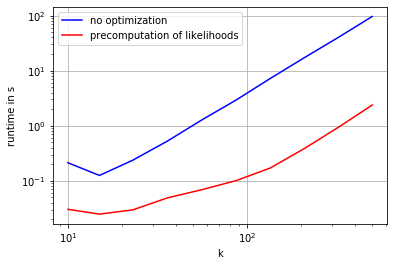

In [9]:
plot_results(results,'b',label='no optimization')
plot_results(results2,'r',label='precomputation of likelihoods')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
sns.set()

In [10]:
cooks_dumb=get_results_for_task(task_Cooks_dumb,ks=np.array(np.logspace(1,2.7,10),dtype=int))

 90%|█████████ | 9/10 [01:26<00:19, 19.95s/it]

In [ ]:
cooks_clever=get_results_for_task(task_Cooks_clever,ks=np.array(np.logspace(1,2.7,10),dtype=int))

In [ ]:
plot_results(cooks_dumb,'b',label='no optimization')
plot_results(cooks_clever,'r', label='using valuation basis')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)

In [ ]:
np.logspace(1,2.7,10)